## KNN e Árvore de Regressão

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de K-vizinhos mais próximos (KNN) e Árvore de Regressão.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [2]:
import pandas as pd

dados_adv = pd.read_csv('Advertising.csv', index_col=0)

dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

O algoritmo KNN é implementado pela classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a>:

In [3]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2,weights='uniform')
neigh.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Aqui, o algoritmo é configurado com K = 2 e o peso de cada instância é definido uniformemente.

O "formato" do modelo aprendido pelo KNN é bem diferente do aprendido pela regressão linear:

Text(0, 0.5, 'Preço')

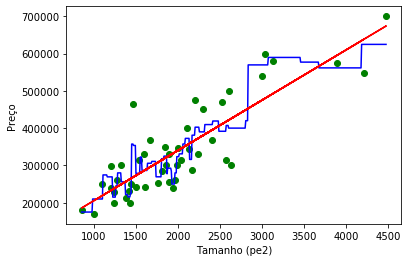

In [4]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]


#predição por KNN
T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh.predict(T)
plt.scatter(X, y,color='g')
plt.plot(T, y_,color='b')


#predição por regressão linear
linear = LinearRegression().fit(X,y)
plt.plot(X, linear.predict(X),color='r')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')



A parametrização K e o peso das instâncias podem ser alteradas no momento da instanciação do objeto, por exemplo:
    
```python
    neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform') # K = 3, peso uniforme
    neigh = KNeighborsRegressor(n_neighbors=2,weights='distance') # K = 2, peso baseado na distância
```    

   
    

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R^2).

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd


#carregando a base para classificação
dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)

dados_por

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


### 1 — Recebe um dado não classificado;

In [39]:
#features para regressão no KNN
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]
X,y

(    tamanho
 0      2104
 1      1600
 2      2400
 3      1416
 4      3000
 5      1985
 6      1534
 7      1427
 8      1380
 9      1494
 10     1940
 11     2000
 12     1890
 13     4478
 14     1268
 15     2300
 16     1320
 17     1236
 18     2609
 19     3031
 20     1767
 21     1888
 22     1604
 23     1962
 24     3890
 25     1100
 26     1458
 27     2526
 28     2200
 29     2637
 30     1839
 31     1000
 32     2040
 33     3137
 34     1811
 35     1437
 36     1239
 37     2132
 38     4215
 39     2162
 40     1664
 41     2238
 42     2567
 43     1200
 44      852
 45     1852
 46     1203,      preco
 0   399900
 1   329900
 2   369000
 3   232000
 4   539900
 5   299900
 6   314900
 7   198999
 8   212000
 9   242500
 10  239999
 11  347000
 12  329999
 13  699900
 14  259900
 15  449900
 16  299900
 17  199900
 18  499998
 19  599000
 20  252900
 21  255000
 22  242900
 23  259900
 24  573900
 25  249900
 26  464500
 27  469000
 28  475000
 29  299900
 30 

### 2 — Configura o Regressor 

*Dados da Função :*
* n_neighbors = Número de vizinhos que serão utilizados para classificação.

------------------------------------------------------------------------------------------------------------------

* weight = função utilizada na predição de targets. 
    Possíveis valores :

    * ‘uniform’ : Pesos Uniformes. Todos os pontos em cada vizinhança são ponderados igualmente.

    * ‘distance’ : Pontos ponterados pelo inversos de suas distâncias. Nesse caso, vizinhosmais próximos ao ponto para classificação terão maior influência em relação aos seus vizinhos mais distântes.

    * [callable] : utiliza um vetor de parametros para ponderação e retorna um vetor ponderado.

    * Pesos uniformes são utilizados por default.





In [68]:
neigh = KNeighborsRegressor(n_neighbors=2,weights='uniform')


In [69]:
neigh

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

*Retorno da Função:*


* Algorithm:

Algorithm utilizado para calcular os vizinhos mais próximos:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ Decidirá o algoritmo mais apropriado baseado no fit.

--------------------------------------------------------------------------------------------------------------
* leaf_size=30 :

Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.


--------------------------------------------------------------------------------------------------------------

* metric='minkowski': 


the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a Glossary, in which case only “nonzero” elements may be considered neighbors.

--------------------------------------------------------------------------------------------------------------

* metric_params=None: 
Additional keyword arguments for the metric function.

--------------------------------------------------------------------------------------------------------------
* n_jobs=None:

The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.

--------------------------------------------------------------------------------------------------------------

* n_neighbors=2: 
Número de vizinhos utilizados para consulta.

Number of neighbors to use by default for kneighbors queries.

--------------------------------------------------------------------------------------------------------------
* p=2: 

Parâmetro para métrica por Minkowski. Quando p=1, será utilizado a distancia de manhattan. Quando p = 2, será utilizado a distância euclidiada. Para um valor p qualquer , a distancia de minkowski será utilizada


--------------------------------------------------------------------------------------------------------------
* weight = função utilizada na predição de targets. 
    Possíveis valores :

    * ‘uniform’ : Pesos Uniformes. Todos os pontos em cada vizinhança são ponderados igualmente.

    * ‘distance’ : Pontos ponterados pelo inversos de suas distâncias. Nesse caso, vizinhosmais próximos ao ponto para classificação terão maior influência em relação aos seus vizinhos mais distântes.

    * [callable] : utiliza um vetor de parametros para ponderação e retorna um vetor ponderado.

    * Pesos uniformes são utilizados por default.

In [70]:
neigh  #regressor previamente configurado

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

### 3 - Treinamento (FIT) o regressor de acordo com X e Y (algoritmo KNN)

Fit é a função no qual o modelo utiliza X como treinamento e Y como os valores targets 

In [71]:
Treinamento = neigh.fit(X,y)  #multiplica as configurações do regressores e pondera com X e configura Y como previsao.

Treinamento


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

### 4 - Aplica um conjunto T para predição baseado no FIT do Regressor  (Predição por KNN)

T é um conjunto de pontos qualquer utilizado para o KNN
y_ 

In [72]:
T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]

y_ = Treinamento.predict(T) #Conjunto de predição dos T pontos

T

array([[ 852.        ],
       [ 859.26653307],
       [ 866.53306613],
       [ 873.7995992 ],
       [ 881.06613226],
       [ 888.33266533],
       [ 895.5991984 ],
       [ 902.86573146],
       [ 910.13226453],
       [ 917.3987976 ],
       [ 924.66533066],
       [ 931.93186373],
       [ 939.19839679],
       [ 946.46492986],
       [ 953.73146293],
       [ 960.99799599],
       [ 968.26452906],
       [ 975.53106212],
       [ 982.79759519],
       [ 990.06412826],
       [ 997.33066132],
       [1004.59719439],
       [1011.86372745],
       [1019.13026052],
       [1026.39679359],
       [1033.66332665],
       [1040.92985972],
       [1048.19639279],
       [1055.46292585],
       [1062.72945892],
       [1069.99599198],
       [1077.26252505],
       [1084.52905812],
       [1091.79559118],
       [1099.06212425],
       [1106.32865731],
       [1113.59519038],
       [1120.86172345],
       [1128.12825651],
       [1135.39478958],
       [1142.66132265],
       [1149.927

* Dados Reais

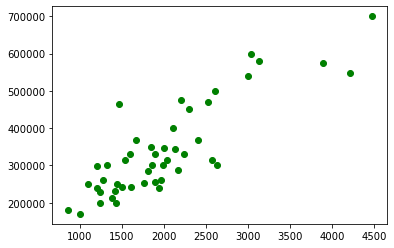

In [73]:
plt.scatter(X, y,color='g')  #exibe o gráfico dos dados reais

 

* Classificação do conjunto T por KNN

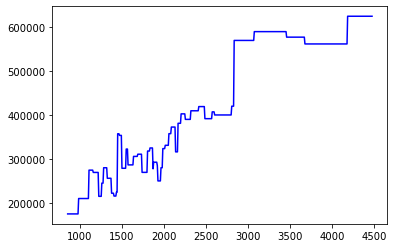

In [74]:
plt.plot(T, y_,color='b')    #Exibe os caminhos de decisão para predição. 

* Uniao dos dados

Note que a decisão do KNN para predição está baseada na distância média entre os n_neighbors fornecidos

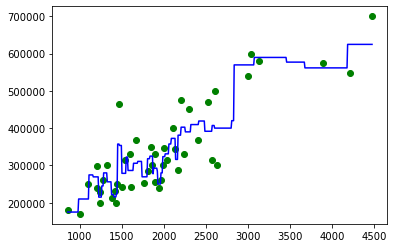

In [75]:
plt.scatter(X, y,color='g')
plt.plot(T, y_,color='b')    

Pela avaliação isual, nota-se que quanto maior o n_neighbors, mais o KNN se aproxima da média do conjunto total

### Avaliando o Erro por RSS e R2

R2 = R^2 (coefficient of determination) regression score function. Qto mais próximo de 1, melhor, pois o algoritmo acertou a predição
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


RSS = Mede a acurácia do modelo, ou seja, o quanto o meu modelo de previsão acertou
The residual sum of squares (RSS) is the sum of the squared distances between your actual versus your predicted values

In [51]:
from sklearn.metrics import r2_score

#determina o j(tetha) (soma do quadrado dos residuos)  slide 17
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
#Mede a proporção da variabilidade de Y que pode ser explicada por X.   
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [76]:
rss = calc_rss(y,Treinamento.predict(T)[0:47])
r2 = calc_r2(y,Treinamento.predict(T)[0:47])
print(rss)
print(r2)

1593271341007.0
-22.249336851128913


Avaliando pelo RSS e R2 nota-se que a acuracia está ruim.
Diminuindo neibors nota-se que o R2 mesmo nao vai pra 1.

Conclusao: Novas variaveis devem ser consideradas para um novo treinamento do modelo

In [78]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

dados_adv = pd.read_csv('Advertising.csv', index_col=0)

dados_adv

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### Previsao de Vendas pela Qde de TV

In [82]:
#Treina modelo utilizando dados de TV, radio e newspaper para prever preco

X = dados_adv.loc[:,['TV']]
y = dados_adv.loc[:,['sales']]

X

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [109]:
#Treinamento do algoritmo KNN
neigh_tv = KNeighborsRegressor(n_neighbors=2,weights='uniform')

neigh_tv


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [110]:
#Aplicando os pesos para predicao

neigh_peso = neigh_tv.fit(X,y)

neigh_peso

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [111]:
#Teste do algoritmo para predição
y_tv = neigh_peso.predict(y)

y_tv


array([[8.4 ],
       [7.25],
       [6.  ],
       [6.85],
       [5.45],
       [6.05],
       [6.3 ],
       [5.45],
       [4.25],
       [7.25],
       [6.  ],
       [7.6 ],
       [6.  ],
       [6.  ],
       [6.85],
       [8.2 ],
       [5.45],
       [8.2 ],
       [6.3 ],
       [5.45],
       [7.35],
       [5.45],
       [4.25],
       [9.  ],
       [6.  ],
       [6.3 ],
       [7.15],
       [9.  ],
       [6.85],
       [7.25],
       [7.1 ],
       [6.3 ],
       [6.  ],
       [7.6 ],
       [6.  ],
       [5.45],
       [9.  ],
       [5.45],
       [6.  ],
       [7.1 ],
       [9.  ],
       [7.6 ],
       [7.1 ],
       [5.45],
       [5.25],
       [5.45],
       [7.25],
       [8.2 ],
       [5.45],
       [6.  ],
       [6.3 ],
       [7.25],
       [8.2 ],
       [7.1 ],
       [7.1 ],
       [8.2 ],
       [4.25],
       [5.45],
       [8.2 ],
       [6.85],
       [6.15],
       [8.2 ],
       [9.  ],
       [5.45],
       [7.35],
       [6.  ],
       [6.

Text(0, 0.5, 'Preço')

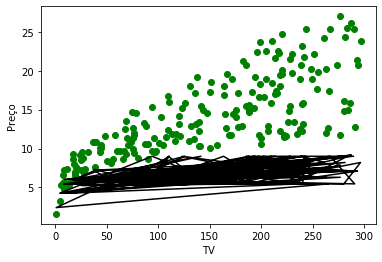

In [112]:
#avaliação visual
plt.scatter(X, y,color='g')
plt.plot(X, y_tv,color='k')
plt.xlabel('TV')
plt.ylabel('Preço')



In [113]:
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

rss = calc_rss(y,y_tv)
r2 = calc_r2(y,y_tv)
print(rss)
print(r2)

14613.2775
-44.85077109324268


### Previsao de Vendas pela Qde de Rádio

In [114]:
#Treina modelo utilizando dados de TV, radio e newspaper para prever preco

X = dados_adv.loc[:,['radio']]
y = dados_adv.loc[:,['sales']]

X

,radio
1,37.8
2,39.3
3,45.9
4,41.3
5,10.8
...,...
196,3.7
197,4.9
198,9.3
199,42.0


In [127]:
#Treinamento do algoritmo KNN
neigh_radio = KNeighborsRegressor(n_neighbors=2,weights='uniform')

neigh_radio

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [128]:
#Aplicando os pesos para predicao

neigh_radio = neigh_radio.fit(X,y)

neigh_radio

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [129]:
#Teste do algoritmo para predição
y_radio = neigh_radio.predict(y)

y_radio

array([[15.75],
       [14.9 ],
       [11.05],
       [14.05],
       [ 8.2 ],
       [12.45],
       [10.15],
       [12.9 ],
       [10.45],
       [12.45],
       [13.15],
       [13.3 ],
       [11.05],
       [10.65],
       [13.05],
       [15.75],
       [ 8.2 ],
       [13.25],
       [ 5.8 ],
       [12.65],
       [14.65],
       [ 8.2 ],
       [10.7 ],
       [14.9 ],
       [10.65],
       [ 8.2 ],
       [11.65],
       [10.2 ],
       [13.05],
       [12.45],
       [16.6 ],
       [10.15],
       [11.75],
       [13.3 ],
       [11.75],
       [ 8.2 ],
       [10.7 ],
       [11.65],
       [13.7 ],
       [12.3 ],
       [15.7 ],
       [12.8 ],
       [13.6 ],
       [ 8.2 ],
       [12.25],
       [11.65],
       [12.45],
       [16.85],
       [11.65],
       [10.65],
       [ 5.8 ],
       [12.45],
       [15.75],
       [16.6 ],
       [ 9.45],
       [15.85],
       [11.6 ],
       [12.9 ],
       [15.85],
       [14.05],
       [12.55],
       [16.  ],
       [

Text(0, 0.5, 'Preço')

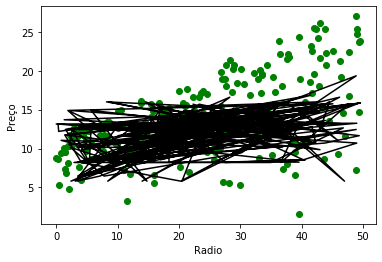

In [130]:
#avaliação visual
plt.scatter(X, y,color='g')
plt.plot(X, y_radio,color='k')
plt.xlabel('Radio')
plt.ylabel('Preço')

In [131]:
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

rss = calc_rss(y,y_radio)
r2 = calc_r2(y,y_radio)
print(rss)
print(r2)

5551.735
-2.5698964529501738


## Árvore de Regressão

A árvore de decisão é implementada através da classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a>.


In [140]:
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

In [141]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  
  
    
# fit the regressor with X and Y data 
tree.fit(X, y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0, 0.5, 'Preço')

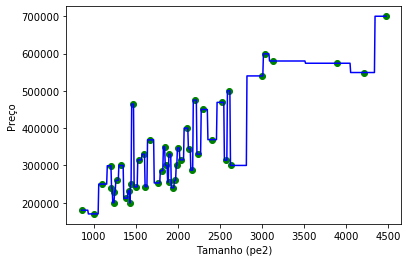

In [142]:
plt.scatter(X, y,color='g')
y_t = tree.predict(T)
plt.plot(T, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

É possível também gerar a árvore resultante para visualização:

Este código irá gerar um arquivo <b>tree.dot</b>.

Esse arquivo pode ser visualizado no site <a href='http://www.webgraphviz.com/'>http://www.webgraphviz.com</a>

## Exercício 2

Qual seria o melhor método para montar um modelo em cada uma das bases com Árvore de Decisão?

Utilizar apenas um atributo? multiplos? quais seriam?

## Comparação entre modelos

Agora já sabemos como implementar um modelo linear multivariado:

```python
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X,y)
```

como implementar o regressor KNN:

```python
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor().fit(X,y)
```

e como implementar uma árvore de regressão:

```python
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor().fit(X,y)
```

Conhecemos todos os algoritmos e seus parâmetros, agora como decidir <b>qual</b> deles usar efetivamente? Olhar o <i>fitting</i> em sua base de dados e tomar isso como verdade absoluta pode ser completamente enganoso.

Podemos tentar <i>aliviar</i> esse problema fazendo uma comparação mais inteligente

## Exercício 3

1) Separe as bases <i>Portland_housePrices</i> e <i>Advertising</i> em conjuntos de <i>treinamento</i> e <i>teste</i> (30% das instâncias para teste e 70% para treinamento).

2) Utilize as bases de treinamento para treinar os modelos a serem avaliados, e as bases de teste para avaliar o desempenho regressor dos modelos.

3) Qual é o melhor modelo para cada problema? Por que você fez essa recomendação? (mostre métricas, gráficos, ou as evidências que julgar necessárias).